In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
!head -10 ./neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ


In [18]:
# 30. 形態素解析結果の読み込み

count = 0
sentences = []
s = []
with open('./neko.txt.mecab', 'r') as f:
    for line in f:
        if line not in ('EOS\n', '\n'):
            surface, info = line.split('\t')
            pos, pos1, *_, base, _, _ = info.split(",")
            s.append({"surface": surface, "base":base, "pos":pos, "pos1":pos1})
        elif line == '\n':
            continue
        else:
            sentences.append(s)
            s = []

In [23]:
sentences[3]

[{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
 {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
 {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'},
 {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'},
 {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'},
 {'surface': '', 'base': '*', 'pos': '記号', 'pos1': '一般'}]

In [25]:
# 31. 動詞

verbs = set()
for s in sentences:
    for w in s:
        if w["pos"] == '動詞':
            verbs.add(w["surface"])

print(len(verbs))

3893


In [27]:
#32. 動詞の基本形

verbs_base = set()
for s in sentences:
    for w in s:
        if w["pos"] == '動詞':
            verbs_base.add(w["base"])

print(len(verbs_base))

2300


In [31]:
# 33. 「AのB」

anob = set()

for s in sentences:
    for i in range(len(s) - 2):
        if s[i]["pos"] == "名詞" and s[i+1]["surface"] == "の" and s[i+2]["pos"] == "名詞":
            anob.add((s[i]["surface"] + s[i+1]["surface"] + s[i+2]["surface"]))
            
print(anob)

{'坊主の碁', 'ビールの処', '居士の事', '失恋の結果', '脱兎の勢', '顔の讒訴', '自然の順序', '本会の面目', '方の不利', '内容のいかん', '僕の自覚', '端書の色', '畳の真中', 'おやじの鼻', '襖の影', '鼠の一疋', '様の——', '運動のうち', 'ところのよう', '普通の人類', '天下の女性', '臭の喩', '構造の上', '界の語', '軍の中', '吾輩の心臓', '叔母さんの形', '松の下', '例の平坦', '化物の記述', '主人の寝室', '思いの吾輩', 'ための布団', '泥棒の無謀', '掛矢の事', '旦那の名誉', '自分の口', '眼のふち', '師の遺誡', '時代の淫靡', '稀代の品物', '以上の能力', '十分の休暇', '監督の家', '鏡の前', '先生の頭', '箸の上下', '屋の看板', '健全の人間', '甥の娘', '醍醐の妙味', '煙の行末', '人の鼻', '必然の害', '君の股肱', '読売新聞の上', '烏合の衆', '教授の材料', '名人の道具', '丸の中', '部屋の中', '最中の一つ', 'サンドラ・ベロニの講釈', '月並の処置', '署の管轄', '中学校の生徒', '左右の耳', '沙弥の家', '大概の場合', '窮措大の家', '天の道', '例の通り', '眼の下', '世の行為', '種類のもの', '話の中', '奨励の策', '君の名前', '車屋の方', '鉄扇の由来', '保険の必要', '方のため', '発明の売薬', '寺の境内', '退校の処分', '我慢のしどころ', '大勢の侍従', '東京の鰻', '物体の運動', '人間の品', '漆喰の穴', '法の名医', '此等の事', '体の男', '同一の事実', '鏡花の小説', '前足の運動', '肩の上', '蒸籠の蓋', '袋のなか', '嘘のよう', 'こちらの方', '自己の不明', '家の寄合', '陥落の号外', '当時のまま', '日本人の方', '之の文', '取りの妙味', '万里の異境', '馬の眼', 'すべての病気', '自己の何', '君の哀願', '時の様子', '隣の屋根', '向島の知人', '間の交際', '学生の

In [38]:
# 34. 名詞の連接

output = set()

for s in sentences:
    nouns = ""
    count = 0
    for w in s:
        if w["pos"] == "名詞":
            nouns += w["surface"]
            count += 1
        elif count > 1:
            output.add(nouns)
            nouns = ""
            count = 0
        else:
            continue

for a in list(output)[:20]:
    print(a)

ご免口
どっち馬鹿
松の木主人
君金田
秋取り付き
二度
ゃんちゃんにしたらさぞあたたかでよかろうと了見
髪原因
首実検よう
ためパナマ責め
声棚
刎主人
発明昔
女性影響
それ西洋
団体排斥運動
一つの
群鶴館
後の
貧乏性男


In [69]:
# 35. 単語の出現頻度
count = dict()

for s in sentences:
    for w in s:
        if w["pos"] == "記号":
            continue
        surface = w["surface"] 
        if surface in count:
            count[surface] += 1
        else:
            count[surface] = 1
count_sorted = sorted(count.items(), key = lambda x : -x[1])

for i in range(10):
    print(count_sorted[i])

('の', 9194)
('て', 6868)
('は', 6420)
('に', 6243)
('を', 6071)
('と', 5508)
('が', 5337)
('た', 3988)
('で', 3806)
('も', 2479)


<BarContainer object of 10 artists>

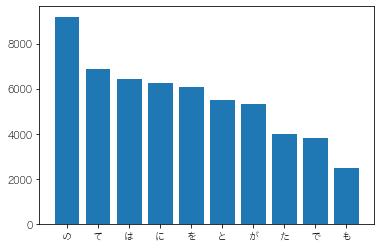

In [70]:
# count_sorted
matplotlib.rcParams['font.family'] = "Hiragino sans"

x, y = [], []
for w, c in count_sorted[:10]:
    x.append(w)
    y.append(c)
plt.bar(x, y)

In [71]:
# 37. 「猫」と共起頻度の高い上位10語
count_neko = dict()

for s in sentences:
    if "猫" not in [w["surface"] for w in s]:
        continue
    for w in s:
        if w["pos"] == "記号":
            continue
        surface = w["surface"] 
        if surface == "猫":
            continue
        if surface in count_neko:
            count_neko[surface] += 1
        else:
            count_neko[surface] = 1
count_neko_sorted = sorted(count_neko.items(), key = lambda x : -x[1])

for i in range(10):
    print(count_neko_sorted[i])

('の', 391)
('は', 272)
('に', 250)
('を', 232)
('て', 229)
('と', 202)
('が', 180)
('で', 170)
('た', 125)
('も', 105)


<BarContainer object of 10 artists>

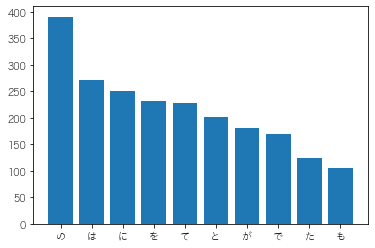

In [72]:
x, y = [], []
for w, c in count_neko_sorted[:10]:
    x.append(w)
    y.append(c)
plt.bar(x, y)

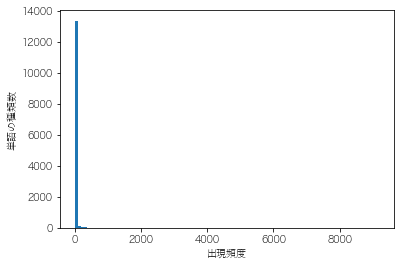

In [90]:
# 38. ヒストグラム
counts = [v for _, v in count_sorted]
plt.hist(counts, bins=100)
plt.xlabel('出現頻度')
plt.ylabel('単語の種類数')
plt.show()

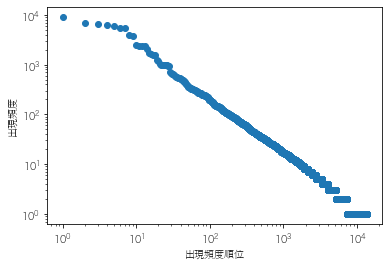

In [99]:
# 39. Zipfの法則

x = []
y = []

for rank, (_, value) in enumerate(count_sorted):
    x.append(rank+1)
    y.append(value)

plt.scatter(x, y)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.show()